In [1]:
library('ggplot2')
library('dplyr')


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Figure 4D/4G

In [2]:
create_polar_bar_chart = function(input_file, y_limit, y_breaks, colors, output_file) {
  data = read.csv(input_file, sep = ',', header = TRUE, stringsAsFactors = FALSE)
    
  data = data %>% mutate(Order = 1:n()) 
  data$Order = factor(data$Order) 
  
  p = data %>% ggplot(aes(x = Order, y = AUC, fill = Order)) + 
    geom_bar(stat = 'identity') + 
    coord_polar(theta = "y") + 
    theme_bw() + 
    theme_minimal() + 
    xlab("") + ylab("") + 
    theme(legend.position = "none", axis.text.y = element_blank(), panel.grid.minor = element_blank()) + 
    geom_text(aes(label = Model, x = Order, y = 0, fontface = "italic"), size = 3, hjust = 1) +
    scale_y_continuous(limits = c(0, y_limit), breaks = seq(0, y_limit, by = y_breaks)) + 
    scale_fill_manual(values = colors)

  ggsave(output_file, plot = p, height = 6, width = 6, dpi = 300)
  p
}

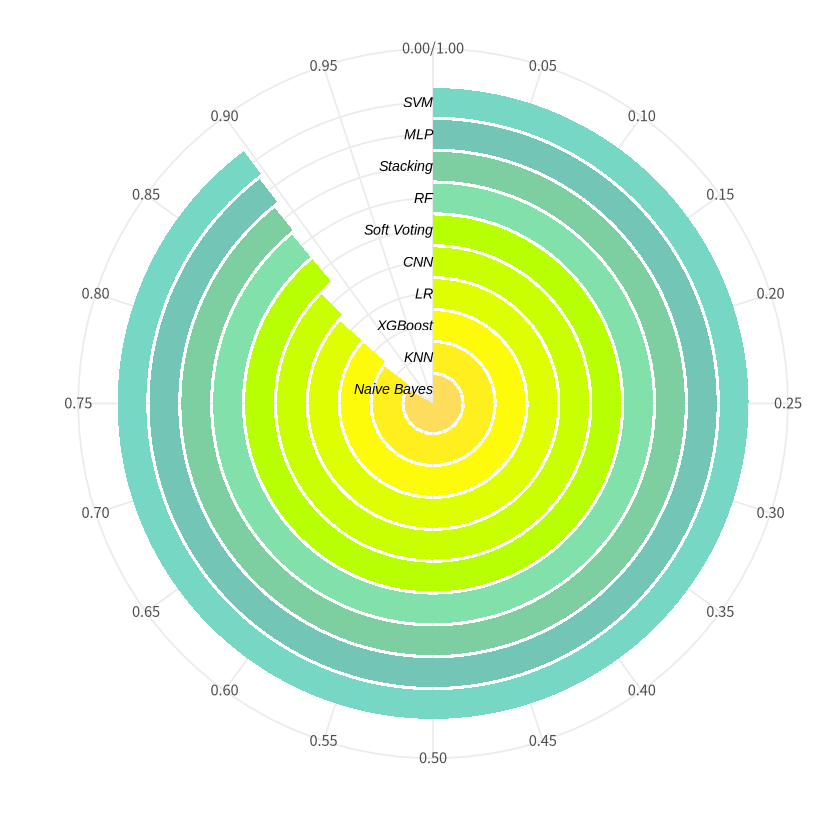

In [3]:
input_file = './Input/07_DEG_model_select.csv'
y_limit = 1
y_breaks = 0.05
colors = c("#ffdd5c", "#ffef1e", "#fdfa0a", "#deff02", "#c9ff00", "#b7ff02", "#82e0aa", "#7dcea0", "#73c6b6", "#76d7c4", "#76c0cb")
output_file = './Output/08_DEG_model_select_barplot.pdf'
create_polar_bar_chart(input_file, y_limit, y_breaks, colors, output_file)